## imports

In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from imblearn.pipeline import Pipeline as imbPipeline
from sklearn.feature_selection import SelectKBest, chi2, f_classif
from sklearn.feature_selection import RFE
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings('ignore')

In [58]:
data_df = pd.read_csv("/BankChurners.csv")

In [59]:
data_df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [60]:
data_df.shape

(10127, 21)

In [61]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

In [62]:
# Statistical values of numerical columns can be check here. This way we can figure out the outliers according to statictical values.
data_df.describe()

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,1.012700e+04,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,7.391776e+08,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894
std,3.690378e+07,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691
min,7.080821e+08,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,7.130368e+08,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000
50%,7.179264e+08,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000
75%,7.731435e+08,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000
max,8.283431e+08,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000


In [63]:
data_df.columns

Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'],
      dtype='object')

In [64]:
data_df.isnull().sum()

CLIENTNUM                   0
Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

In [65]:
data_df[data_df.duplicated()]

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio


In [66]:
# Correlation between the numerical columns can be seen below.
data_df.corr().T

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
CLIENTNUM,1.000000,0.007613,0.006772,0.134588,0.006907,0.005729,0.005694,0.005708,0.000825,0.005633,0.017369,-0.019692,-0.002961,0.007696,0.000266
Customer_Age,0.007613,1.000000,-0.122254,0.788912,-0.010931,0.054361,-0.018452,0.002476,0.014780,0.001151,-0.062042,-0.046446,-0.067097,-0.012143,0.007114
Dependent_count,0.006772,-0.122254,1.000000,-0.103062,-0.039076,-0.010768,-0.040505,0.068065,-0.002688,0.068291,-0.035439,0.025046,0.049912,0.011087,-0.037135
Months_on_book,0.134588,0.788912,-0.103062,1.000000,-0.009203,0.074164,-0.010774,0.007507,0.008623,0.006732,-0.048959,-0.038591,-0.049819,-0.014072,-0.007541
Total_Relationship_Count,0.006907,-0.010931,-0.039076,-0.009203,1.000000,-0.003675,0.055203,-0.071386,0.013726,-0.072601,0.050119,-0.347229,-0.241891,0.040831,0.067663
Months_Inactive_12_mon,0.005729,0.054361,-0.010768,0.074164,-0.003675,1.000000,0.029493,-0.020394,-0.042210,-0.016605,-0.032247,-0.036982,-0.042787,-0.038989,-0.007503
Contacts_Count_12_mon,0.005694,-0.018452,-0.040505,-0.010774,0.055203,0.029493,1.000000,0.020817,-0.053913,0.025646,-0.024445,-0.112774,-0.152213,-0.094997,-0.055471
Credit_Limit,0.005708,0.002476,0.068065,0.007507,-0.071386,-0.020394,0.020817,1.000000,0.042493,0.995981,0.012813,0.171730,0.075927,-0.002020,-0.482965
Total_Revolving_Bal,0.000825,0.014780,-0.002688,0.008623,0.013726,-0.042210,-0.053913,0.042493,1.000000,-0.047167,0.058174,0.064370,0.056060,0.089861,0.624022
Avg_Open_To_Buy,0.005633,0.001151,0.068291,0.006732,-0.072601,-0.016605,0.025646,0.995981,-0.047167,1.000000,0.007595,0.165923,0.070885,-0.010076,-0.538808


In [67]:
# We do not need to unique "Clientnum" column for this analysis stage.
data_df = data_df.drop(["CLIENTNUM"], axis =1)

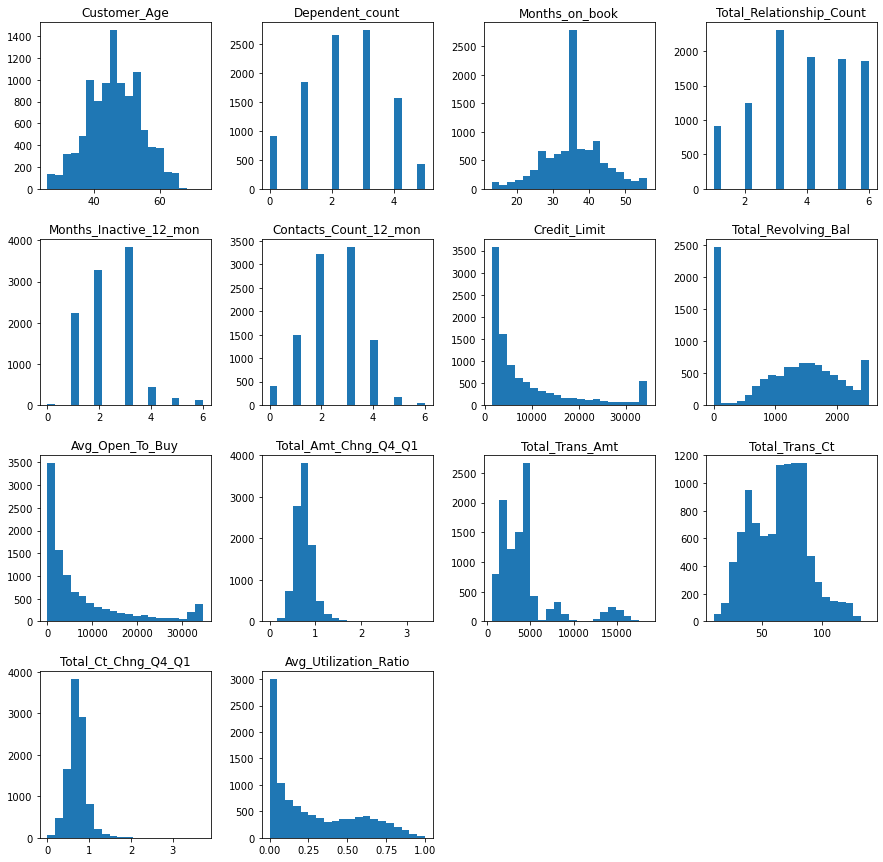

In [68]:
# Lets see the general distrubition of the numerical variables

axList = data_df.hist(bins=20, figsize = (15, 15),grid= False)
plt.savefig("Hist.png")

<AxesSubplot:xlabel='Marital_Status', ylabel='count'>

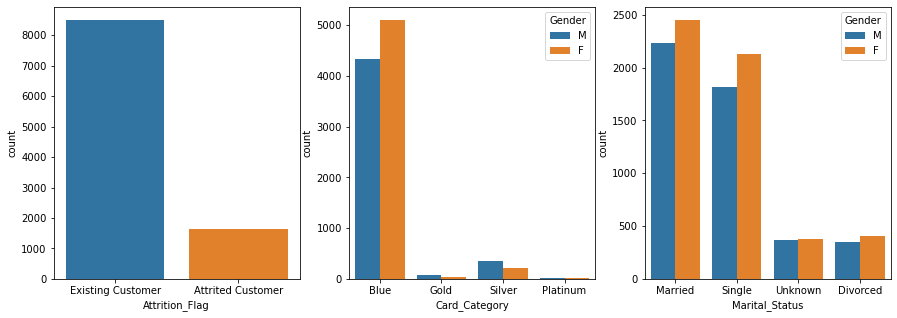

In [69]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))
sns.countplot(x = data_df['Attrition_Flag'],ax=axes[0])
sns.countplot(x = data_df['Card_Category'], hue = data_df['Gender'],ax=axes[1])
sns.countplot(x = data_df['Marital_Status'],hue = data_df['Gender'],ax=axes[2])


<AxesSubplot:xlabel='Education_Level', ylabel='count'>

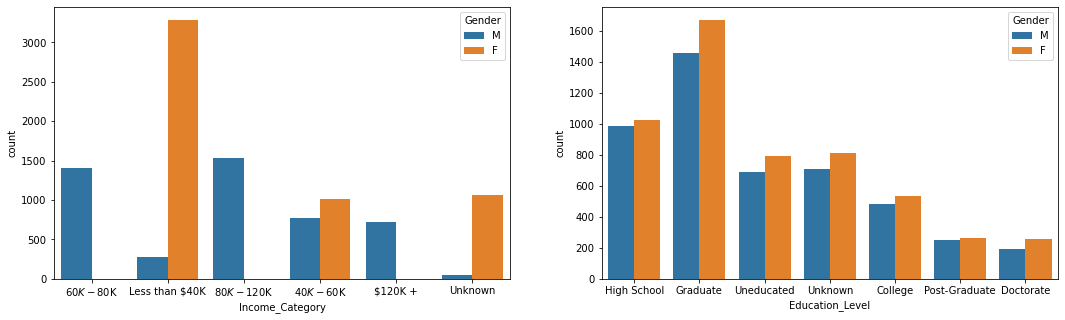

In [70]:
fig, axe = plt.subplots( ncols=2, figsize=(18, 5))
sns.countplot(x = data_df['Income_Category'],hue = data_df['Gender'], ax=axe[0])
sns.countplot(x= data_df['Education_Level'],hue = data_df['Gender'],ax=axe[1])

## Encoding The Categorical Features

In [71]:
data_df.Attrition_Flag = data_df.Attrition_Flag.replace({'Attrited Customer':1,'Existing Customer':0})
data_df.Gender = data_df.Gender.replace({'F':1,'M':0})

In [72]:
#Now one hot encoding
df_new=pd.get_dummies(data_df, columns=['Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category'],drop_first=True)
print(df_new.shape)

(10127, 33)


In [73]:
df_new.columns

Index(['Attrition_Flag', 'Customer_Age', 'Gender', 'Dependent_count',
       'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'Education_Level_Doctorate', 'Education_Level_Graduate',
       'Education_Level_High School', 'Education_Level_Post-Graduate',
       'Education_Level_Uneducated', 'Education_Level_Unknown',
       'Marital_Status_Married', 'Marital_Status_Single',
       'Marital_Status_Unknown', 'Income_Category_$40K - $60K',
       'Income_Category_$60K - $80K', 'Income_Category_$80K - $120K',
       'Income_Category_Less than $40K', 'Income_Category_Unknown',
       'Card_Category_Gold', 'Card_Category_Platinum', 'Card_Category_Silver'],
      dtype='object')

## Data Upsampling Using SMOTE

In [74]:
oversample = SMOTE()
X, y = oversample.fit_resample(df_new[df_new.columns[1:]], df_new[df_new.columns[0]])
usampled_df = X.assign(Attrition_Flag = y)

In [75]:
# standardisation
scaler=StandardScaler()
X_scaled = scaler.fit_transform(X)

In [76]:
ohe_data =usampled_df[usampled_df.columns[15:-1]].copy()
usampled_df = usampled_df.drop(columns=usampled_df.columns[15:-1])

In [77]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled,y,test_size = 0.20,random_state = 1234)

## Base Model Performance

                     Algo  CrossVal_Score_Means  CrossValerrors
0  RandomForestClassifier              0.976618        0.004290
1    SupportVectorMachine              0.943971        0.005709
2    KNeighborsClassifier              0.907279        0.006376


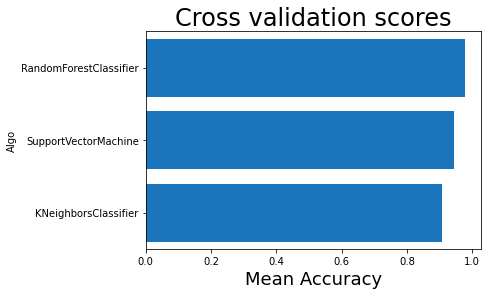

<Figure size 864x576 with 0 Axes>

In [78]:
kfold = KFold(n_splits=8,shuffle=True, random_state=42)

rs = 15
clrs = []

clrs.append(RandomForestClassifier(random_state=rs))
clrs.append(svm.SVC(random_state=rs))
clrs.append(KNeighborsClassifier())

cv_results = []
for clr in clrs :
    cv_results.append(cross_val_score(clr, X_train, y_train , scoring = 'accuracy', cv = kfold, n_jobs=-1))

cv_means = []
cv_std = []
for cv_result in cv_results:
    cv_means.append(cv_result.mean())
    cv_std.append(cv_result.std())
    
cv_df = pd.DataFrame({"Algo":["RandomForestClassifier",'SupportVectorMachine','KNeighborsClassifier'],"CrossVal_Score_Means":cv_means,"CrossValerrors": cv_std})
g = sns.barplot(x=cv_df["CrossVal_Score_Means"],y=cv_df["Algo"],orient = "h",color = '#0078d7')
g.set_xlabel("Mean Accuracy",fontsize = 18)
g = g.set_title("Cross validation scores",fontsize = 24)
plt.figure(figsize = (12,8))
print(cv_df)

### Random Forest with default parameters 

In [79]:
RFC = RandomForestClassifier()
RFC.fit(X_train,y_train)
y_pred = RFC.predict(X_test)
print("Accuracy:",accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
c_matrix_RFC_sm=confusion_matrix(y_test, y_pred)
print(classification_report(y_test,y_pred))

Accuracy: 0.9788235294117648
[[1666   46]
 [  26 1662]]
              precision    recall  f1-score   support

           0       0.98      0.97      0.98      1712
           1       0.97      0.98      0.98      1688

    accuracy                           0.98      3400
   macro avg       0.98      0.98      0.98      3400
weighted avg       0.98      0.98      0.98      3400



### SVM with default parameters 

In [80]:
svc=svm.SVC()
svc.fit(X_train,y_train)
y_pred = svc.predict(X_test)
print("Accuracy:",accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))

Accuracy: 0.9482352941176471
[[1648   64]
 [ 112 1576]]
              precision    recall  f1-score   support

           0       0.94      0.96      0.95      1712
           1       0.96      0.93      0.95      1688

    accuracy                           0.95      3400
   macro avg       0.95      0.95      0.95      3400
weighted avg       0.95      0.95      0.95      3400



### KNN with default parameters

In [81]:
knn=KNeighborsClassifier()
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)
print("Accuracy:",accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))

Accuracy: 0.9179411764705883
[[1589  123]
 [ 156 1532]]
              precision    recall  f1-score   support

           0       0.91      0.93      0.92      1712
           1       0.93      0.91      0.92      1688

    accuracy                           0.92      3400
   macro avg       0.92      0.92      0.92      3400
weighted avg       0.92      0.92      0.92      3400



### Hyper Parameter Tunning for Random Forest

In [82]:
rf = RandomForestClassifier()

parameters = {
    'n_estimators' : [1200,1500,1700],
    'criterion': ['entropy','gini'],
    'max_depth' : [120,150,170]
}

grid_search_rf = GridSearchCV(rf, parameters, n_jobs = -1, cv = 5, verbose = 1)
grid_result_rf = grid_search_rf.fit(X_train, y_train)
grid_result_rf

Fitting 5 folds for each of 18 candidates, totalling 90 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': [120, 150, 170],
                         'n_estimators': [1200, 1500, 1700]},
             verbose=1)

### Hyper Parameter Tunning for SVM

In [83]:
# List of C values
C_range = np.logspace(-1, 1, 3)
gamma_range = np.logspace(-1, 1, 3)
param_grid = { 
    "C": C_range,
    "kernel": ['rbf', 'poly','sigmoid'],
    "gamma": gamma_range.tolist()
    }
scoring = ['accuracy']

grid_search_svm = GridSearchCV(estimator=svc, 
                           param_grid=param_grid, 
                           scoring=scoring, 
                           refit='accuracy', 
                           n_jobs=-1, 
                           verbose=1,cv=5)
grid_result_svm = grid_search_svm.fit(X_train, y_train)
grid_result_svm

Fitting 5 folds for each of 27 candidates, totalling 135 fits


GridSearchCV(cv=5, estimator=SVC(), n_jobs=-1,
             param_grid={'C': array([ 0.1,  1. , 10. ]),
                         'gamma': [0.1, 1.0, 10.0],
                         'kernel': ['rbf', 'poly', 'sigmoid']},
             refit='accuracy', scoring=['accuracy'], verbose=1)

### Hyper Parameter Tunning for KNN

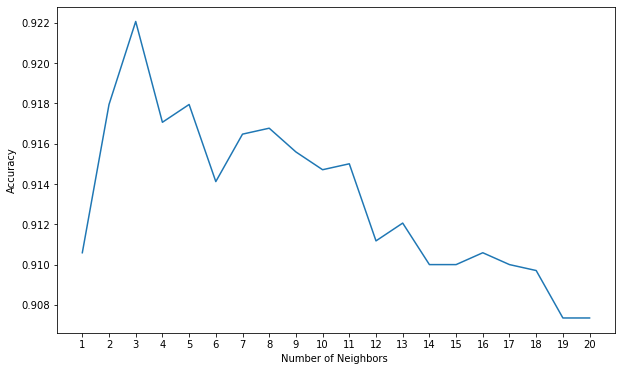

In [84]:
# Ploting graph No_of_neighbors vs Accuracy to pick the range of n_neighbors
mean_acc = np.zeros(20)
for i in range(1,21):
    #Train Model and Predict  
    knn = KNeighborsClassifier(n_neighbors = i).fit(X_train,y_train)
    yhat= knn.predict(X_test)
    mean_acc[i-1] =accuracy_score(y_test, yhat)

loc = np.arange(1,21,step=1.0)
plt.figure(figsize = (10, 6))
plt.plot(range(1,21), mean_acc)
plt.xticks(loc)
plt.xlabel('Number of Neighbors ')
plt.ylabel('Accuracy')
plt.show()

In [85]:
grid_params = {'n_neighbors' : [2,3,4,5,6],
               'weights' : ['uniform','distance'],
               'metric' : ['minkowski','euclidean','manhattan']}
grid_search_knn = GridSearchCV(KNeighborsClassifier(), grid_params, verbose = 1, cv=5, n_jobs = -1)
grid_result_knn = grid_search_knn.fit(X_train, y_train)
grid_result_knn

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'metric': ['minkowski', 'euclidean', 'manhattan'],
                         'n_neighbors': [2, 3, 4, 5, 6],
                         'weights': ['uniform', 'distance']},
             verbose=1)

## Checking The Best Estimators


In [86]:
# get the hyperparameters with the best score randome forest
print("Random Forest Best Params:",grid_result_rf.best_params_)

Random Forest Best Params: {'criterion': 'entropy', 'max_depth': 120, 'n_estimators': 1700}


In [87]:
# get the hyperparameters with the best score Support vector machine
print("SVM Best Params:",grid_result_svm.best_params_)

SVM Best Params: {'C': 10.0, 'gamma': 0.1, 'kernel': 'rbf'}


In [88]:
# get the hyperparameters with the best score K-neighbor
print("KNN Best Params:",grid_result_knn.best_params_)

KNN Best Params: {'metric': 'manhattan', 'n_neighbors': 6, 'weights': 'distance'}


### Training Random Forest  Model With Best Hyper Parameters

In [89]:
rf = RandomForestClassifier(criterion = 'entropy', n_estimators = 1700,max_depth= 120)
rf.fit(X_train, y_train)
y_pred_rf= RFC.predict(X_test)
y_proba_rf = RFC.predict_proba(X_test)

In [90]:
print("RandomForestClassifier")
print("Accuracy:",accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred_rf))
roc_auc_score_rf = roc_auc_score(y_test, y_pred_rf)

RandomForestClassifier
Accuracy: 0.9788235294117648
              precision    recall  f1-score   support

           0       0.91      0.93      0.92      1712
           1       0.93      0.91      0.92      1688

    accuracy                           0.92      3400
   macro avg       0.92      0.92      0.92      3400
weighted avg       0.92      0.92      0.92      3400

[[1666   46]
 [  26 1662]]


ROC curve - RandomForestClassifier


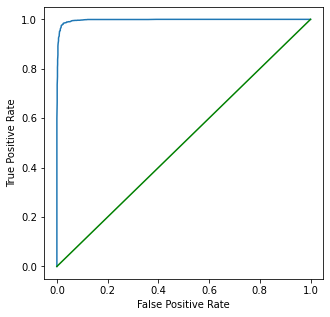

In [91]:
from sklearn.metrics import roc_curve
from sklearn.metrics import RocCurveDisplay
def plot_sklearn_roc_curve(y_real, y_pred):
    fpr, tpr, _ = roc_curve(y_real, y_pred)
    roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()
    roc_display.figure_.set_size_inches(5,5)
    plt.plot([0, 1], [0, 1], color = 'g')
# Plots the ROC curve using the sklearn methods
print("ROC curve - RandomForestClassifier")
plot_sklearn_roc_curve(y_test, y_proba_rf[:, 1])


### Ploting Feature Importace

In [92]:
feature = pd.Series(rf.feature_importances_, index = X.columns).sort_values(ascending = False)
print(feature)

Total_Trans_Ct                    0.188479
Total_Trans_Amt                   0.187483
Total_Revolving_Bal               0.093583
Total_Ct_Chng_Q4_Q1               0.081565
Avg_Utilization_Ratio             0.059513
Total_Relationship_Count          0.059495
Total_Amt_Chng_Q4_Q1              0.055098
Credit_Limit                      0.032307
Avg_Open_To_Buy                   0.032304
Customer_Age                      0.026752
Marital_Status_Married            0.023352
Months_on_book                    0.019085
Months_Inactive_12_mon            0.017616
Contacts_Count_12_mon             0.013868
Marital_Status_Single             0.012924
Education_Level_Graduate          0.012602
Dependent_count                   0.011287
Education_Level_High School       0.009874
Gender                            0.009594
Income_Category_$60K - $80K       0.009043
Income_Category_$80K - $120K      0.007307
Education_Level_Uneducated        0.006533
Income_Category_$40K - $60K       0.006106
Income_Cate

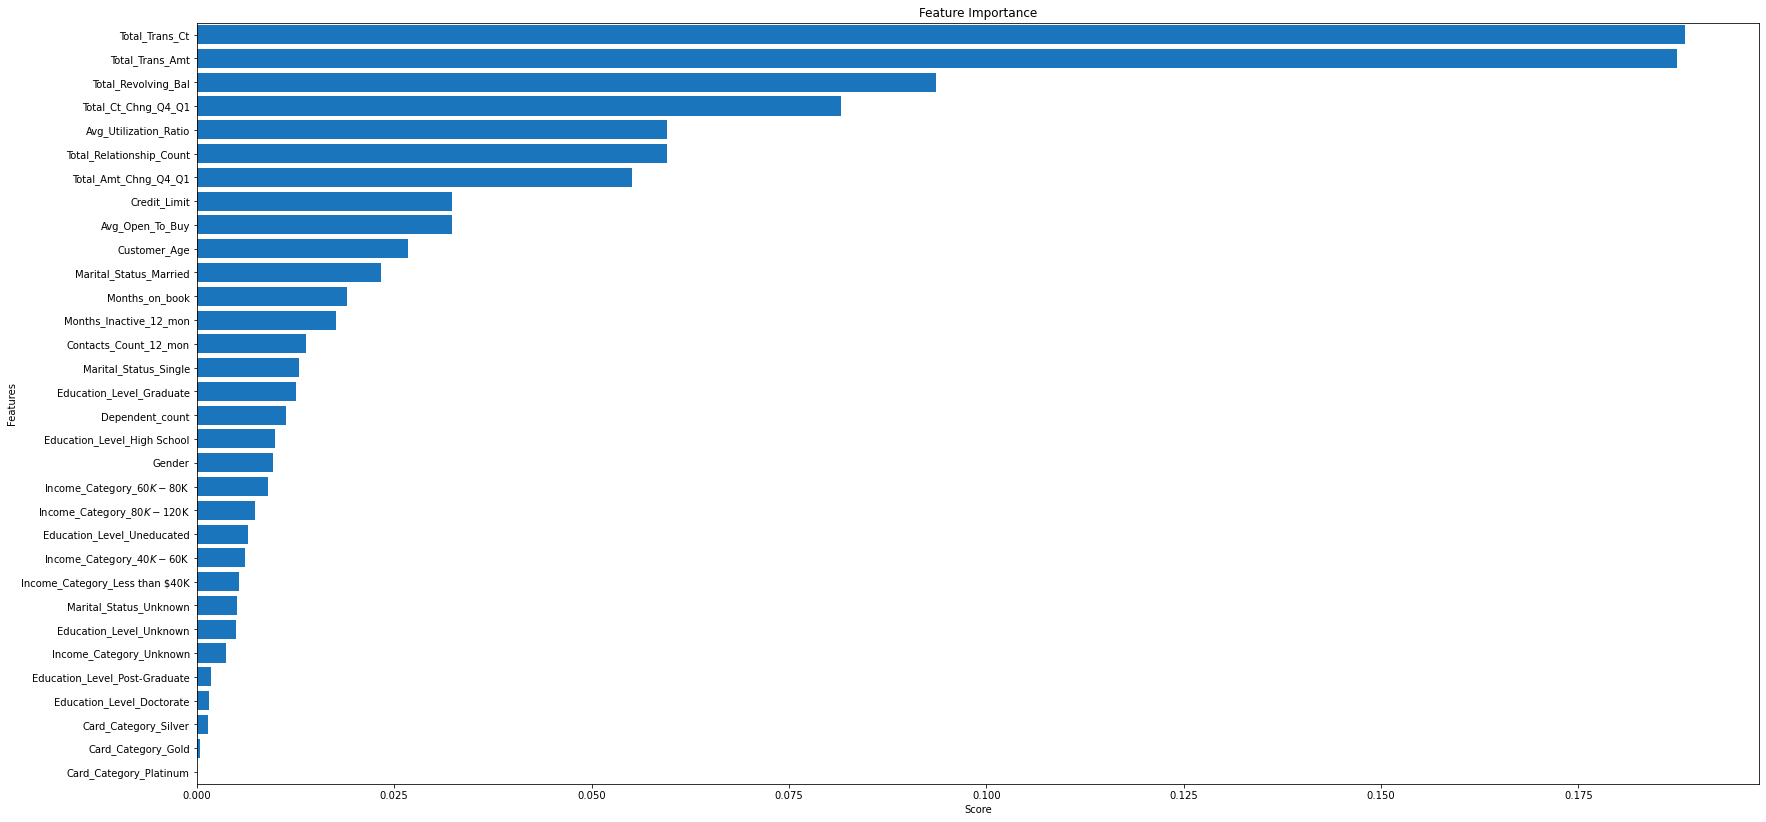

In [93]:
plt.figure(figsize = (28,14))
sns.barplot(x = feature, y = feature.index,color = '#0078d7')
plt.title("Feature Importance")
plt.xlabel('Score')
plt.ylabel('Features')
plt.show()

### Training SVM Model With Best Hyper Parameters


In [94]:
svc=svm.SVC(C= 0.1, gamma= 0.1, kernel= 'rbf',probability=True)
svc.fit(X_train,y_train)
y_pred_svm = svc.predict(X_test)
y_proba_svm = svc.predict_proba(X_test)

In [95]:
print("SupportVectorMachine")
print("Accuracy:",accuracy_score(y_test, y_pred_svm))
print(confusion_matrix(y_test, y_pred_svm))
print(classification_report(y_test,y_pred_svm))
roc_auc_score_svm = roc_auc_score(y_test, y_pred_svm)

SupportVectorMachine
Accuracy: 0.8917647058823529
[[1681   31]
 [ 337 1351]]
              precision    recall  f1-score   support

           0       0.83      0.98      0.90      1712
           1       0.98      0.80      0.88      1688

    accuracy                           0.89      3400
   macro avg       0.91      0.89      0.89      3400
weighted avg       0.90      0.89      0.89      3400



ROC curve - KNN


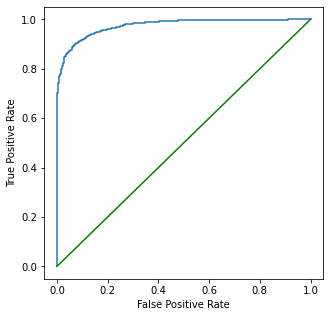

In [96]:
# Plots the ROC curve using the sklearn methods
print("ROC curve - KNN")
plot_sklearn_roc_curve(y_test, y_proba_svm[:, 1])

### Training KNN Model With Best Hyper Parameters


In [97]:
# use the best hyperparameters
knn = KNeighborsClassifier(n_neighbors = 6, weights = 'distance',metric = 'manhattan')
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
# Predict the classes on the test data, and return the probabilities for each class
y_proba_knn = knn.predict_proba(X_test)
print("K-KNeighborsClassifier")
print("Accuracy:",accuracy_score(y_test, y_pred_knn))
print(confusion_matrix(y_test, y_pred_knn))
print(classification_report(y_test,y_pred_knn))
roc_auc_score_knn = roc_auc_score(y_test, y_pred_knn)

K-KNeighborsClassifier
Accuracy: 0.9455882352941176
[[1625   87]
 [  98 1590]]
              precision    recall  f1-score   support

           0       0.94      0.95      0.95      1712
           1       0.95      0.94      0.95      1688

    accuracy                           0.95      3400
   macro avg       0.95      0.95      0.95      3400
weighted avg       0.95      0.95      0.95      3400



ROC curve - KNN


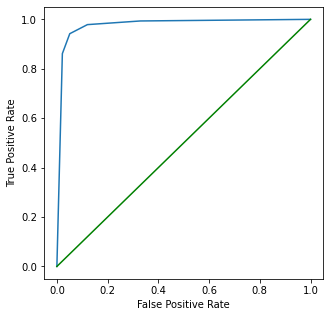

In [98]:

# Plots the ROC curve using the sklearn methods
print("ROC curve - KNN")
plot_sklearn_roc_curve(y_test, y_proba_knn[:, 1])

In [99]:
roc_df = pd.DataFrame({"Algo":["RandomForestClassifier",'SupportVectorMachine','KNeighborsClassifier'],"roc_auc_score":[roc_auc_score_rf,roc_auc_score_svm,roc_auc_score_knn]})
print(roc_df)

                     Algo  roc_auc_score
0  RandomForestClassifier       0.978864
1    SupportVectorMachine       0.891124
2    KNeighborsClassifier       0.945563
